### Evaluation Exercises

Do you work for this exercise in either a jupyter notebook named ```evaluate``` within your ```regression-exercises``` repository. By the end of this exercise you will also create a python script named ```evaluate```, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name ```evaluate``` within your regression-exercises repo.

**1. Load the ```tips``` dataset from either ```pydataset``` or ```seaborn```.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats

from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pydataset
from pydataset import data

In [2]:
#tips = sns.load_dataset('tips')

df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


**Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.**

In [3]:
#establish a baseline
x = df['total_bill']
y = df['tip']


In [4]:
df['baseline'] = df['tip'].mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


#### Baseline is 2.998279

______________________________________________________________________________________________________________________________________

**2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:**

In [5]:
#The code below fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. 
#Modify the code as necessary to work with the tips dataset.

#generate parameters - model
ols_model = ols('tip ~ total_bill', data=df).fit()

# generate parameters, i.e. create model
#ols_model = ols('y ~ x', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df.total_bill)
df


,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
241,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
242,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
243,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

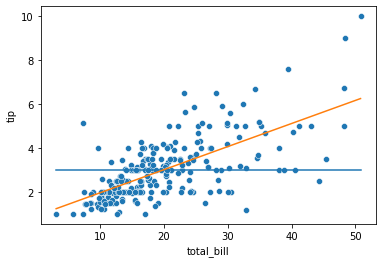

In [8]:

sns.scatterplot(x='total_bill', y='tip', data = df)
sns.lineplot(x='total_bill', y='baseline', data = df);
sns.lineplot(x='total_bill', y='yhat', data = df)

______________________________________________________________________________________________________________________________________

**3.  Plot the residuals for the linear regression model that you made.**

In [6]:
# calculating residuals
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline

df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


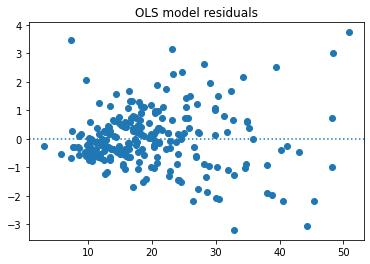

In [7]:
plt.scatter(x, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

_________________________________________________________________________________________________

**4.Calculate for the model:**
- mean squared error (MSE)
- sum of squared errors (SSE)
- root mean squared error (RMSE)
- total sum of squares (TSS)
    - TSS = SSE_baseline
    - TSS = SSE + ESS
- explained sum of squares (R<sup>2</sup>)
    - R<sup>2</sup> = ESS/TSS
    - R<sup>2</sup> = 1 - SSE/TSS  (since ESS + SSE = TSS)

**5.  Calculate the SSE, MSE, and RMSE for the baseline model (i.e., a model that always predicts the average tip amount).**

### Calculating MAE (Mean Absolute Error):
- MAE =  0.7458253894586339
- MAE Baseline =  1.0330186777747912


In [9]:
# average of absolute values of residuals
MAE = abs(df.residual).mean()
MAE_baseline = abs(df.baseline_residual).mean()
print("MAE = ", MAE)
print("MAE Baseline = ", MAE_baseline)

MAE =  0.7458253894586339
MAE Baseline =  1.0330186777747912


### Calculating Sum of Square Errors (SSE)

- SSE Model =  252.788743850776
- SSE Baseline =  465.2124770491804

The SSE of the baseline model is $465.20

In [10]:
# First, square the model and baseline residuals

df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2



,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131,1.950869,2.921721,3.805888,8.536455
241,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836,-1.774836,-0.998279,3.150043,0.996560
242,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175,-1.301175,-0.998279,1.693057,0.996560
243,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807,-1.041807,-1.248279,1.085361,1.558200


In [11]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print("SSE = ", SSE)
print("SSE Baseline = ", SSE_baseline)

print("In regression, the 'line of best fit' is one which minimizes the SSE")

SSE =  252.788743850776
SSE Baseline =  465.2124770491804
In regression, the 'line of best fit' is one which minimizes the SSE


### Calculating Mean Squared Error (MSE)

- MSE Model =  1.036019442011377
- MSE baseline =  1.906608512496641

- average of SSE = SSE/(no. of data points)
- the average of your errors that have each been squared

In [12]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE baseline =  1.906608512496641


In [10]:
#could've used sklearn
mean_squared_error(df.tip, df.yhat)

1.036019442011377

### Calculating Root Mean Squared Error (RMSE)
- RMSE =  1.0178504025697377
- RMSE baseline =  1.3807999538298954
- Square root of MSE
- Same units as the output (y) variableError (MSE)

In [13]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)
print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298954


In [11]:
#could've used sklearn
mean_squared_error(df.tip, df.yhat, squared = False)

1.0178504025697377

### Calculating Total Sum of Squares (TSS) 
- TSS Model =  252.788743850776
- TSS baseline =  465.2124770491804

- for the baseline, its the same as the SSE

In [14]:
TSS = df['baseline_residual^2'].sum()
TSS_baseline = df['baseline_residual^2'].sum()
print("TSS Model = ", TSS)
print("TSS baseline = ", TSS_baseline)

TSS Model =  465.2124770491804
TSS baseline =  465.2124770491804


### Calculating Explained Sum of Squared Error  (ESS)



In [15]:
# ESS - Explained sum of squares ('Explained Error')
ESS = sum((df.yhat - y.mean())**2)
ESS_baseline = 0
print("ESS Model = ", ESS)


ESS Model =  212.4237331984042


______________________________________________________________________________________________________________________________________

**6.  Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**

In [16]:
if SSE < SSE_baseline: 
    print(f"My model performs better than the baseline model.")  
    print(f'(Because, my model SSE of {SSE}, is lower than the baseline model of {SSE_baseline}.)')  
else: 
        print(f"My model does not beat the baseline!") 

My model performs better than the baseline model.
(Because, my model SSE of 252.788743850776, is lower than the baseline model of 465.2124770491804.)


______________________________________________________________________________________________________________________________________

**7.  What is the amount of variance explained in your model?**
- R<sup>2</sup> is the amount of variance in the model, from 0 to 1
- R<sup>2</sup> = ESS/TSS
- R<sup>2</sup> = 1 - (SSE/TSS) (since ESS + SSE = TSS)


In [17]:
R2 = ESS / TSS

#R<sup>2</sup> = 1 - SSE / TSS  #(since ESS + SSE = TSS) 

print(f'The variance in my model is described by R2, which is: {R2}')


The variance in my model is described by R2, which is: 0.45661658635167607


In [14]:
#Could have just used
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        16:46:04   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

______________________________________________________________________________________________________________________________________

**8.  Is your model significantly better than the baseline model?**

**Since the p-value < alpha, total_bill is a good feature, but the R<sup>2</sup> value of 0.46 says that it only accounts for 46% variation in the data. This tells us that we would want tto combine it with another feature to raise the R<sup>2</sup> value.**

**Can I trust that value of R<sup>2</sup> is statistically significant?
Is the model with n number of independent variables any better than model with 0 explanatory variables?**
- Use F statistics 
- Is p value less than alpha level (0.05)
- R<sup>2</sup> is useful for feature selection 

Examples:
R<sup>2</sup> = 0.9**  The relationship between two variables explains 90% variation in the data
R<sup>2</sup> = 0.03** The relationship only accounts for 3% variation in the data. Something else must be explaining the rest of 97% variation

In [18]:
# in Statsmodel, look at model summary:
    
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        15:42:45   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

______________________________________________________________________________________________________________________________________

**9. Create a file named ```evaluate.py``` that contains the following functions.**
- ```plot_residuals(y, yhat)```: creates a residual plot
- ```regression_errors(y, yhat)```: returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
- ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
- ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false.
- ```model_significance(ols_model)```: that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the ```rsquared``` and ```f_pvalue``` properties from the ols model)

In [ ]:
def regression_errors(y, yhat):
    
    '''
    This function takes in y and yhat values and returns
    the following values:  MSE, SSE, ESS, TSS,  RMSE.
    '''
    
    #calculate SSE
    df['residual^2'] = df.residual**2
    SSE = df['residual^2'].sum()
    
    #calculate MSE
    MSE = SSE/len(df)
    
    #calculate ESS
    ESS = sum((df.yhat - y.mean())**2)
    
    #calculate TSS:
    TSS = ESS + SSE
    
    #calculate RMSE: 
    

    print(f' Sum of Squared Errors (SSE): {SSE}')
    print(f' Mean Squared Error (MSE): {MSE}')
    print(f' Total Sum of Squares (TSS): {TSS}')
    print(f' Explained Sum of Squares (ESS): {ESS}')
    print(f' Root Mean Squared Error (RMSE): {RMSE})

In [62]:
def plot_residuals(y, yhat):
    
    '''
    This function takes in  y and yhat values and returns 
    a residual plots.
    '''
    
    # calculating residuals
    df['residual'] = y - df.yhat
    df['baseline_residual'] = y - df.baseline
    
    # plot residuals of model
    mplot = plt.scatter(x, df.residual)
    plt.axhline(y = 0, ls = ':')
    plt.title('OLS model residuals');

    return 

    

______________________________________________________________________________________________________________________________________

**10. Load the ```mpg``` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your ```evaluate.py``` to help accomplish this.**

In [63]:
# mpg = sns.load_dataset('tips')

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [64]:
# establish a baseline
x = mpg['displ']
y = mpg['hwy']

mpg['baseline'] = x.mean()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,3.471795
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,3.471795
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,3.471795
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,3.471795
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,3.471795


In [65]:
x.shape, y.shape

((234,), (234,))

In [66]:
#The code below fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. 
#Modify the code as necessary to work with the tips dataset.

#generate parameters - model
mpg_ols = ols('hwy ~ displ', data=mpg).fit()

# compute predictions and add to original dataframe
mpg['yhat'] = mpg_ols.predict(mpg.displ)
mpg



,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,3.471795,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,3.471795,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,3.471795,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,3.471795,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,3.471795,25.812002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,3.471795,28.636473
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,3.471795,28.636473
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,3.471795,25.812002
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,3.471795,25.812002


In [67]:
mpg.yhat.shape

(234,)

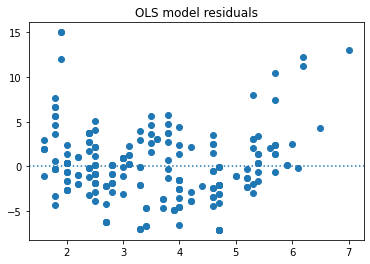

In [68]:
df = mpg

plot_residuals(y, yhat)